In [55]:
import torch
import monai
from monai.metrics import DiceMetric
from monai.losses import DiceLoss, DiceCELoss
import os
import glob
import nibabel as nib
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
loss_ce = DiceLoss()
loss_dice_ce = DiceCELoss()

In [2]:
root_dir = "/scratch/scratch6/akansh12/Parse_data/train/train/"
train_images = sorted(glob.glob(os.path.join(root_dir, "*", 'image', "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(root_dir, "*", 'label', "*.nii.gz")))
data_dicts = [{"images": images_name, "labels": label_name} for images_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-9], data_dicts[-9:]

In [70]:
eg_1 = nib.load(val_files[2]['images']).get_fdata()
eg_1_label = nib.load(val_files[2]['labels']).get_fdata()
eg_1_prediction = nib.load("/scratch/scratch6/akansh12/challenges/parse2022/notebooks/ensemble_val_results/swin_8687/PA000307/PA000307_seg.nii.gz").get_fdata()

Text(0.5, 1.0, 'Label')

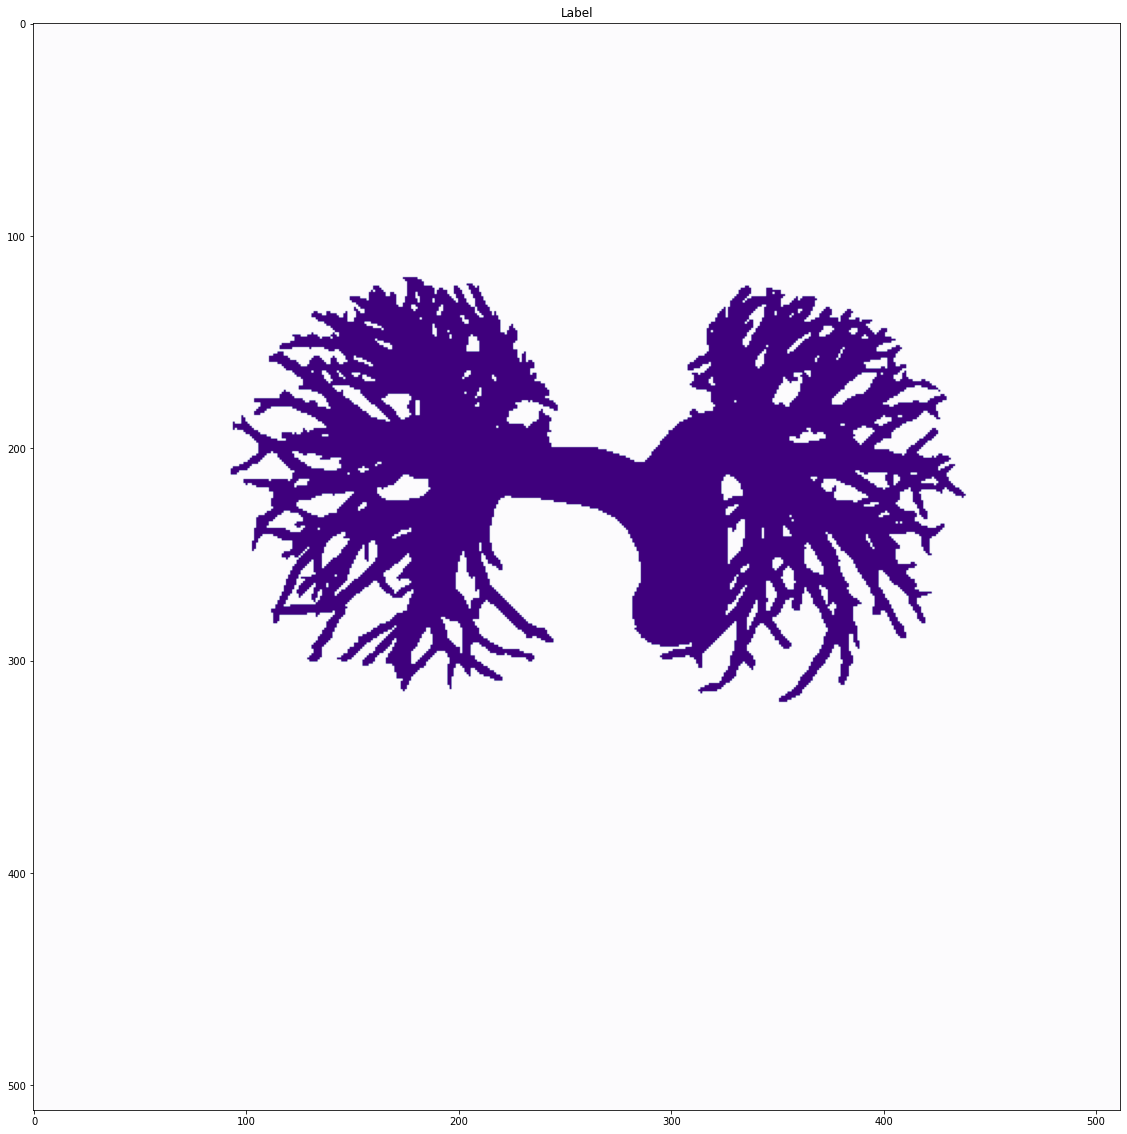

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(np.rot90(eg_1_label.sum(axis = 2) > 0), cmap = 'Purples')
plt.title("Label")
# plt.subplot(1, 3, 2)
# plt.imshow(np.rot90(outputs[i].sum(axis = 2)>0), cmap = 'Purples');
# plt.title("Predicted")
# plt.subplot(1, 3, 3)
# plt.imshow(np.rot90(inputs[i]['labels'][0][0].sum(axis = 2)>0), cmap = 'Purples');
# mask_ = np.ma.masked_where(outputs[i].sum(axis = 2) ==0, outputs[i].sum(axis = 2)>0)
# plt.imshow(np.rot90(mask_), alpha=0.3, cmap = "autumn")
# plt.title("Overlap")

Text(0.5, 1.0, 'Predictions')

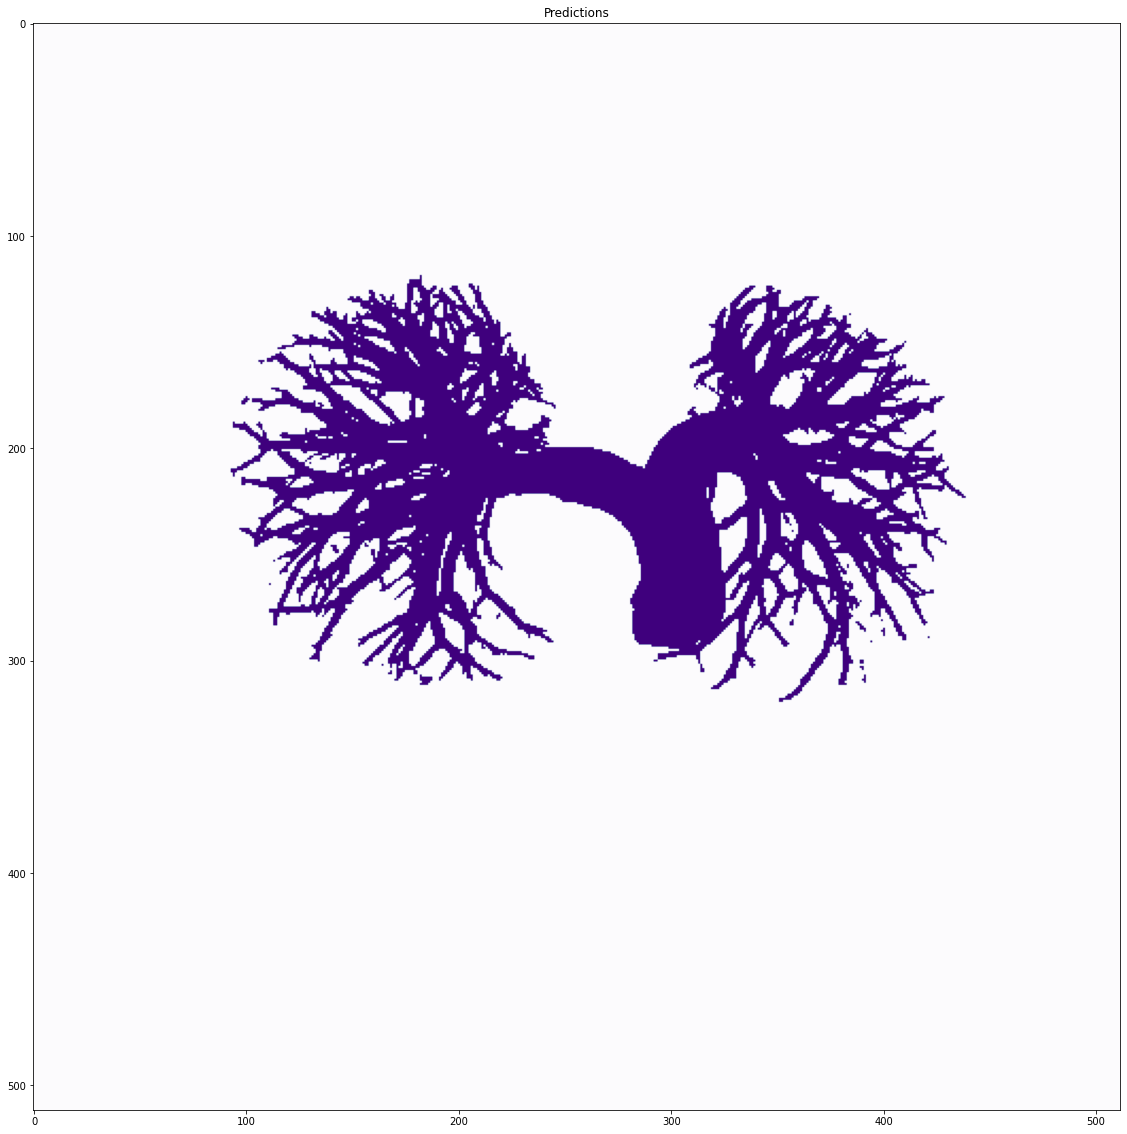

In [72]:
plt.figure(figsize=(20,20))
plt.imshow(np.rot90(eg_1_prediction.sum(axis = 2) > 0), cmap = 'Purples')
plt.title("Predictions")

In [73]:
dice = 2 * (eg_1_label * eg_1_prediction).sum()/(eg_1_label + eg_1_prediction).sum()

In [77]:
print(dice)

0.7996275470755827


Text(0.5, 1.0, 'Predictions')

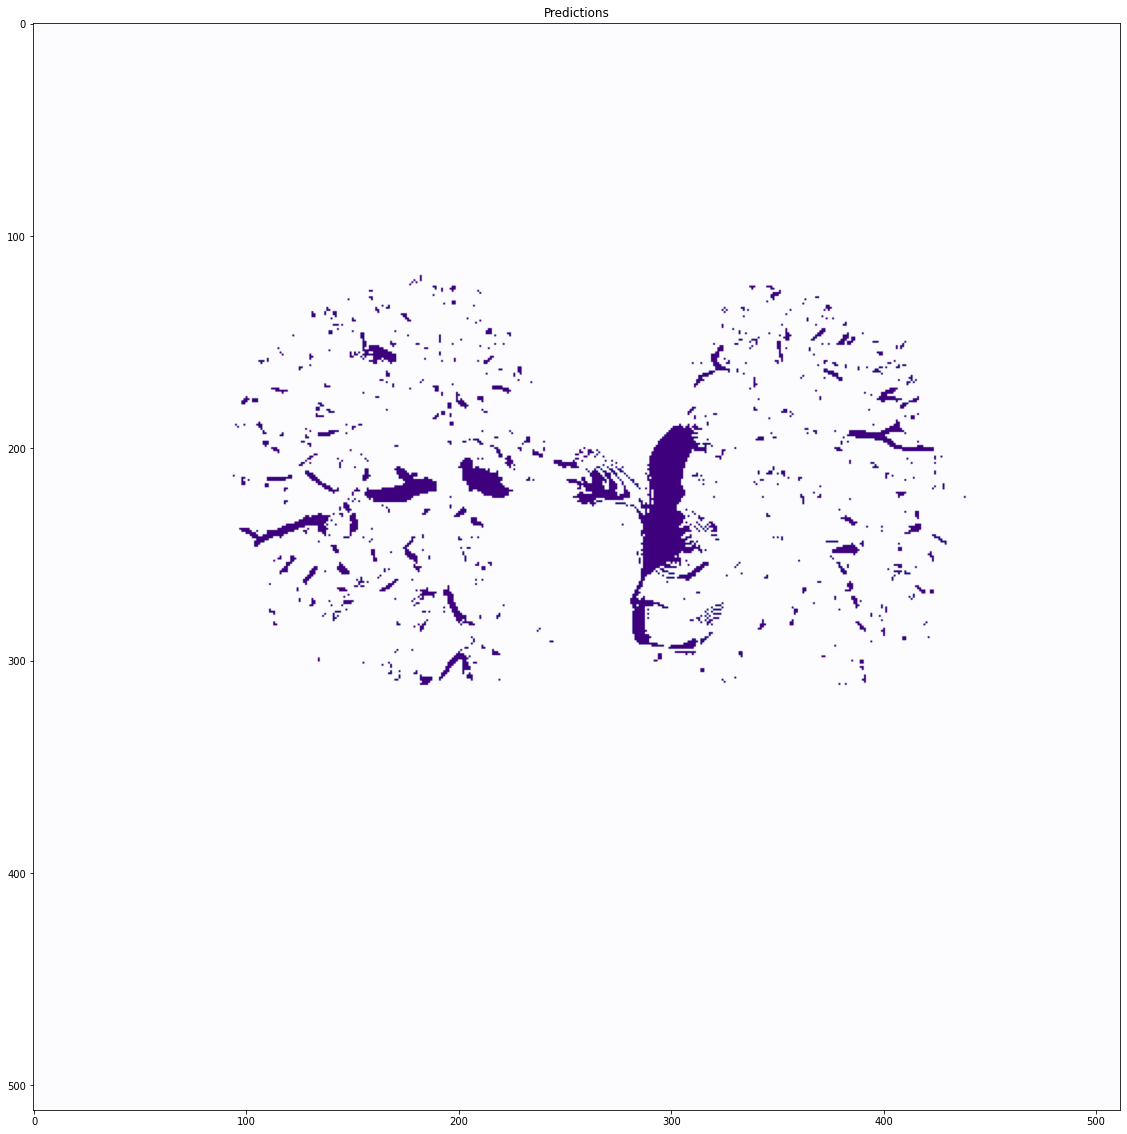

In [78]:
false_postives = eg_1_prediction - (eg_1_label * eg_1_prediction)
plt.figure(figsize=(20,20))
plt.imshow(np.rot90(false_postives.sum(axis = 2) > 0), cmap = 'Purples')
plt.title("Predictions")

Text(0.5, 1.0, 'Predictions')

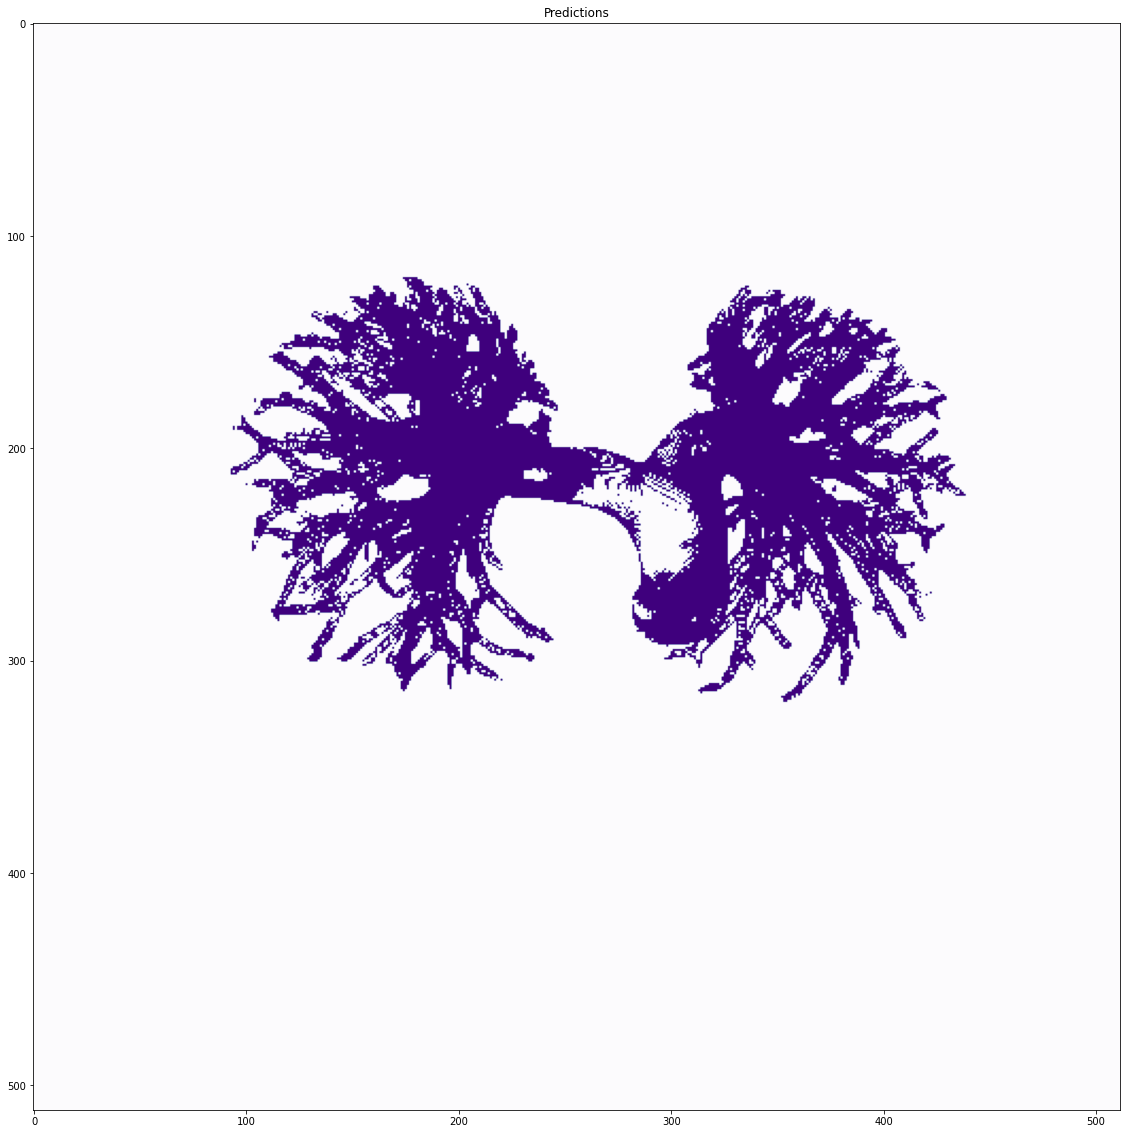

In [79]:
false_negatives = eg_1_label - (eg_1_label * eg_1_prediction)
plt.figure(figsize=(20,20))
plt.imshow(np.rot90(false_negatives.sum(axis = 2) > 0), cmap = 'Purples')
plt.title("Predictions")

Text(0.5, 1.0, 'Predictions')

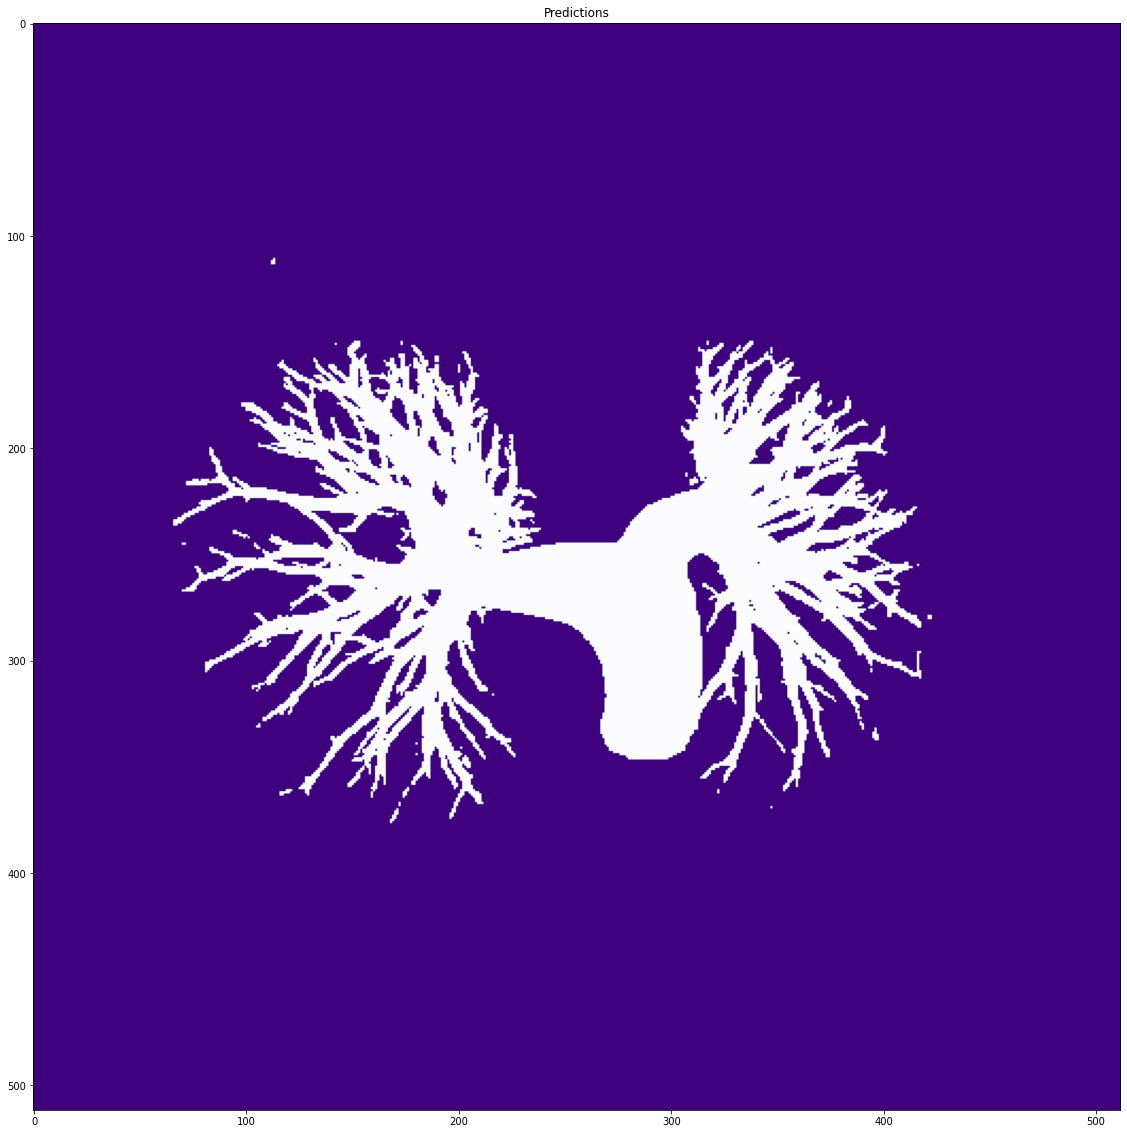

In [42]:
true_negatives = np.zeros_like(eg_1_label) - (eg_1_label + eg_1_prediction - (eg_1_label * eg_1_prediction))
plt.figure(figsize=(20,20))
plt.imshow(np.rot90(true_negatives.sum(axis = 2) == 0 ), cmap = 'Purples')
plt.title("Predictions")

In [56]:
eg_1_label_tensor = torch.from_numpy(eg_1_label)
eg_1_prediction_tensor = torch.from_numpy(eg_1_prediction)

In [57]:
loss = loss_ce(eg_1_prediction_tensor, eg_1_label_tensor)

In [59]:
loss_2 = loss_dice_ce(eg_1_prediction_tensor, eg_1_label_tensor)

In [60]:
loss

tensor(0.0297, dtype=torch.float64)

In [61]:
loss_2

tensor(6.1801, dtype=torch.float64)

In [ ]:
eg_1_label
eg_1_prediction

(512, 512, 352)